# pytorch张量的创建和操作

### Tensors

In [1]:
import torch

In [2]:
# 生成空张量
x = torch.empty(5, 3)
print(x)

tensor([[0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


In [3]:
# 生成随机张量
x = torch.rand(5, 3)
print(x)

tensor([[0.9134, 0.4983, 0.4828],
        [0.9517, 0.4816, 0.6796],
        [0.8687, 0.7801, 0.5605],
        [0.3573, 0.2398, 0.6629],
        [0.7966, 0.9700, 0.2082]])


In [4]:
# 生成全0张量
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [5]:
# python列表转化为pytorch的tensor
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [6]:
# 或者根据现有的张量创建张量。重用张量的shape和dtype
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)  

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.9550, -1.4400,  0.9242],
        [-0.4318, -1.2278, -0.4229],
        [-0.5276,  0.0289, -0.5014],
        [-0.6549, -1.5193, -1.0159],
        [-0.9128,  0.2373, -0.0552]])


In [7]:
# 获取尺寸
print(x.size())

torch.Size([5, 3])


### Operations

In [8]:
# 加法有2种方式
y = torch.rand(5, 3)
print(x + y)
# -------------------
print(torch.add(x, y))


tensor([[ 1.8180, -0.5913,  1.1825],
        [ 0.3996, -0.6948, -0.4156],
        [ 0.4656,  0.1832,  0.4380],
        [-0.3849, -0.8290, -0.1429],
        [-0.6269,  0.7232,  0.8511]])
tensor([[ 1.8180, -0.5913,  1.1825],
        [ 0.3996, -0.6948, -0.4156],
        [ 0.4656,  0.1832,  0.4380],
        [-0.3849, -0.8290, -0.1429],
        [-0.6269,  0.7232,  0.8511]])


In [9]:
# torch.add提供输出张量作为参数
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 1.8180, -0.5913,  1.1825],
        [ 0.3996, -0.6948, -0.4156],
        [ 0.4656,  0.1832,  0.4380],
        [-0.3849, -0.8290, -0.1429],
        [-0.6269,  0.7232,  0.8511]])


In [10]:
# .add_ 内部加
# 任何直接在原张量内部操作都是用_后固定。x.copy_(y), x.t_()
y.add_(x)
print(y)

tensor([[ 1.8180, -0.5913,  1.1825],
        [ 0.3996, -0.6948, -0.4156],
        [ 0.4656,  0.1832,  0.4380],
        [-0.3849, -0.8290, -0.1429],
        [-0.6269,  0.7232,  0.8511]])


In [11]:
# numpy切片查询
print(x[:, 1])

tensor([-1.4400, -1.2278,  0.0289, -1.5193,  0.2373])


In [12]:
# 改变tensor的形状，如tensorflow的reshape
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [13]:
# 如果张量中只有一个元素，使用.item（）将值转化为Python数字
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.5084])
0.5083978176116943


### 和numpy的互换

In [14]:
# Torch Tensor==>numpy数组: .numpy()
a = torch.ones(5)
b = a.numpy()
print(b)
print(type(a))
print(type(b))

[1. 1. 1. 1. 1.]
<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [15]:
# Torch Tensor的值在内部改变了，对应转成numpy的b的值也变了
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [16]:
# numpy数组==>Torch Tensor: .from_numpy()
# numpy里的值改变了，对应映射的Torch Tensor值也动态改变了
import numpy as np
a = np.ones(5) #[1,1,1,1,1]
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


除了CharTensor之外，所有在CPU上的Tensors都支持和NumPy互转

### CUDA Tensors

In [18]:
# 可以使用.to方法将张量移动到任何设备上
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # 直接在GPU上创建张量，或用`.to("cuda")``从CPU移到GPU上
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` 把z从GPU移到CPU上,同时也可以改变dtype

tensor([1.5084], device='cuda:0')
tensor([1.5084], dtype=torch.float64)


# autograd: 自动微分
PyTorch中所有神经网络的核心是autograd包。 让我们首先简要地访问它，然后我们将去训练我们的第一个神经网络。

autograd软件包为Tensors上的所有操作提供自动微分。 它是一个运行时定义的框架，这意味着backprop由您的代码运行方式来定义，并且每个迭代都可以不同。

torch.Tensor是包的核心类。如果将其属性.requires_grad设置为True，它将开始跟踪其上的所有操作。完成计算后，您可以调用.backward（）并自动计算所有梯度。此张量的梯度将累积到.grad属性中。

要阻止张量跟踪历史记录，可以调用.detach（）将其从计算历史中分离出来，防止将来的计算被追踪。

要防止跟踪历史记录（和使用内存），您还可以使用torch.no_grad（）包装代码块：在评估模型时，这可能特别有用，因为模型可能具有requires_grad = True的可训练参数，但我们不需要梯度

Tensor和Function互相连接并构建一个非循环图，它编码完整的计算历史。每个张量都有一个.grad_fn属性，该属性引用已创建Tensor的Function（除了用户创建的Tensors  - 他们的grad_fn为None）

如果要计算导数，可以在Tensor上调用.backward（）。如果Tensor是标量（即它包含一个元素数据），则不需要为backward（）指定任何参数，但是如果它有更多元素，则需要指定梯度参数，该参数为同形状的张量

In [19]:
# 创建一个张量并设置requires_grad = True以跟踪它的计算
import torch
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [20]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward>)


In [21]:
# y是作为操作的结果创建的，因此它具有grad_fn
print(y.grad_fn)

In [22]:
# 均值
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward>) tensor(27., grad_fn=<MeanBackward1>)


In [23]:
# 自定义张量的requires_grad属性默认为False,可以通过.requires_grad_(True)方法外部修改它
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


## 梯度：反向传播
.backward()

In [26]:
# out是只有1个值的标量，out.backward（）等同于out.backward(torch.tensor(1.))
out.backward()
# 梯度 d(out)/dx
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [27]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([ 705.5146, -263.0699,  806.0997], grad_fn=<MulBackward>)


In [28]:
# 在这种情况下，y不再是标量。 torch.autograd无法直接计算完整雅可比矩阵，但如果只想要矢量雅可比行列式，只需将向量作为参数向后传递
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([ 51.2000, 512.0000,   0.0512])


torch.no_grad()

In [29]:
# 一个requires_grad=True的Tensor，可以通过包装torch.no_grad()阻止梯度自动计算
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


# 神经网络
可以使用torch.nn包构建神经网络。

nn依赖于autograd来定义模型并区分它们。 nn.Module包含layers，以及返回输出的forward(input)方法。

它是一个简单的前馈网络。 它接受输入，一层接一层，然后最终给出输出

神经网络的典型训练程序如下：  

定义具有一些可学习参数（或权重）的神经网络  
迭代输入数据集  
通过网络处理输入  
计算损失（输出距离正确多远）  
将梯度传播回给网络参数  
通常使用简单的更新规则更新网络权重：weight = weight  -  learning_rate * gradient

## 定义网络结构

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 正方形 convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a 正方形 you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))  #reshape
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


您只需定义forward函数，当使用autograd时backward函数(计算梯度)会被自动定义。 可以在forward函数中使用任何Tensor操作。

模型的可学习参数通过 net.parameters（）返回

In [32]:
params = list(net.parameters())
print(params)
print(len(params))
print(params[0].size())  # conv1's .weight

[Parameter containing:
tensor([[[[-0.1820,  0.0574, -0.1667,  0.1282,  0.0877],
          [ 0.0826,  0.0360,  0.1517,  0.1247,  0.1280],
          [-0.0058,  0.0741,  0.1493, -0.1632,  0.1904],
          [ 0.1834,  0.0407,  0.0333, -0.0927, -0.1128],
          [ 0.1746,  0.1972, -0.0220, -0.1818,  0.1954]]],


        [[[ 0.0579, -0.0811, -0.0812,  0.0635, -0.1285],
          [ 0.1735, -0.0009,  0.1848, -0.0513,  0.0428],
          [ 0.0716, -0.0263,  0.0551,  0.1119, -0.0964],
          [ 0.1870,  0.1585, -0.1441, -0.0495, -0.0027],
          [-0.1278,  0.1499,  0.0029, -0.0405, -0.0442]]],


        [[[ 0.1686,  0.1657, -0.0743,  0.1452, -0.0463],
          [-0.0190,  0.1622, -0.1674,  0.0229,  0.1856],
          [ 0.0542,  0.0347,  0.0791, -0.1253,  0.1645],
          [-0.1429, -0.0046, -0.0990,  0.1510,  0.1998],
          [ 0.1224, -0.1925, -0.1486,  0.1172,  0.0354]]],


        [[[ 0.1598, -0.1619,  0.0020,  0.0301, -0.1901],
          [ 0.0719, -0.0086,  0.1095, -0.1176,  0.070

尝试一个随机的32x32输入。 注意：此网络（LeNet）要求输入大小为32x32。 要在MNIST数据集上使用此网络，请将数据集中的图像调整为32x32

In [33]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0942, -0.0903, -0.0046,  0.0826, -0.1429,  0.0309, -0.0149,  0.0419,
         -0.1187,  0.1278]], grad_fn=<ThAddmmBackward>)


将所有参数的梯度缓存置0，反向传播采用随机梯度

In [34]:
net.zero_grad()
out.backward(torch.randn(1, 10))

整个torch.nn包只支持小批量样本的输入，而不是单个样本。

例如，nn.Conv2d将采用4D张量的nSamples x nChannels x Height x Width。

如果只有一个样本，只需使用input.unsqueeze(0)变成假批量维度


### 回顾
torch.Tensor  - 支持autograd操作（如backward（））的多维数组。  
nn.Module  - 神经网络模块。包含形成深度神经网络构建的各种模块和损失函数。，帮助将它们转移到GPU，导出，加载等。  
nn.Parameter  - 一种Tensor，在被指定为Module的属性时自动注册为参数。  
autograd.Function  - 实现autograd操作的forward 和backward定义。每个Tensor操作都会创建至少一个Function节点，该节点连接到创建Tensor并对其历史进行编码的函数。
### 已完成
定义网络结构
处理输入和调用反向传播
### 未完成
计算损失
更新网络权重

## 损失函数
nn包下有几种不同的损失函数。 一个简单的损失是：nn.MSELoss计算输入和目标之间的均方误差

In [35]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(1.3692, grad_fn=<MseLossBackward>)


使用.grad_fn 属性追踪反向传播方向的损失，如下所示  
input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d  
      -> view -> linear -> relu -> linear -> relu -> linear  
      -> MSELoss  
      -> loss

当我们调用loss.backward（）时，整个graph 被区分为w.r.t. 损失，图中所有具有requires_grad = True的张量将使用梯度累积的.grad Tensor

In [37]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

## Backprop
要反向传播误差，只要做lost.backward（）。 您需要清除已存在梯度，否则梯度将累积到已存在梯度  
现在将调用loss.backward（），并查看conv1在backward之前和之后的偏置梯度。

In [38]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0010, -0.0006, -0.0027, -0.0136,  0.0040,  0.0038])


## 更新权重
实践中使用的最简单的更新规则是随机梯度下降（SGD）  
weight = weight - learning_rate * gradient

In [39]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)  #weight内部减

是，当您使用神经网络时，您希望使用各种不同的更新规则，例如SGD，Nesterov-SGD，Adam，RMSProp等。为了实现这一点，我们构建了一个小包：torch.optim，它实现了所有这些方法。

In [40]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

观察如何使用optimizer.zero_grad（）手动将梯度缓冲区设置为零。 这是因为梯度是按Backprop部分中的说明累积的

## 训练一个分类器
数据可以用python包加载成numpy array，再转化成torch.*Tensor  
专门针对视觉，我们创建了一个名为torchvision的软件包，它包含用于常见数据集的数据加载器，如Imagenet，CIFAR10，MNIST等，以及用于图像的数据转换器，即torchvision.datasets和torch.utils.data.DataLoader。  
CIFAR-10数据集：
size 3x32x32
10类：‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’.

训练图像分类器,将按顺序执行以下步骤：

使用torchvision加载和标准化CIFAR10训练和测试数据集  
定义卷积神经网络  
定义损失函数  
在训练数据上训练网络  
在测试数据上测试网络

In [41]:
import torch
import torchvision
import torchvision.transforms as transforms

### 使用torchvision加载CIFAR-10

In [42]:

# torchvision数据集的输出是范围[0,1]的PILImage图像。 我们将它们转换为归一化范围的张量[-1,1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


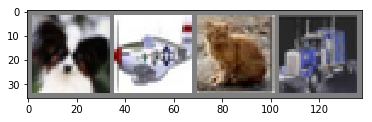

  dog plane   cat truck


In [44]:
# 显示一些训练集看看
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### 定义卷积神经网络

In [45]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # 将前面的神经网络从1-channel改成3-channel
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5) #第一个nn.Conv2d的参数2和第二个nn.Conv2d的参数1，数字要相同
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [46]:
# 使用Classification Cross-Entropy loss and SGD with momentum
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

### 训练
我们只需循环遍历数据迭代器，并将输入提供给网络并进行优化

In [47]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.137
[1,  4000] loss: 1.799
[1,  6000] loss: 1.655
[1,  8000] loss: 1.581
[1, 10000] loss: 1.502
[1, 12000] loss: 1.448
[2,  2000] loss: 1.395
[2,  4000] loss: 1.358
[2,  6000] loss: 1.337
[2,  8000] loss: 1.292
[2, 10000] loss: 1.284
[2, 12000] loss: 1.263
Finished Training


### 在测试集上测试
已经训练了2个epoch,通过预测标签和真实标签做对比  
第一步，从测试集中显示一个图像以熟悉

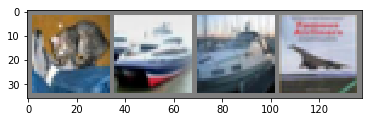

GroundTruth:    cat  ship  ship plane


In [48]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

现在看看神经网络认为上面这些例子是什么

In [49]:
outputs = net(images)

输出是10类的概率。 一个类的概率越高，网络认为图像是这个类的越多。 那么，让我们得到最高概率的索引

In [50]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship  ship


神经网络在整个测试集上的表现

In [51]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 57 %


看起来好于运气--10％的准确性（从10个类中随机挑选一个类）。 似乎网络学到了一些东西  
下面看哪些类分的好，哪些类分的不好

In [53]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 60 %
Accuracy of   car : 72 %
Accuracy of  bird : 39 %
Accuracy of   cat : 35 %
Accuracy of  deer : 47 %
Accuracy of   dog : 47 %
Accuracy of  frog : 70 %
Accuracy of horse : 67 %
Accuracy of  ship : 74 %
Accuracy of truck : 62 %


## 在GPU上训练
就像将Tensor转移到GPU上一样，将神经网络转移到GPU上。  
首先定义可用的CUDA设备

In [54]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


下面这些方法将遍历所有模块，将他们的参数和缓存转移到CUDA设备  
记得每一步的输入和label也要转移到GPU

In [55]:
net.to(device)
inputs, labels = inputs.to(device), labels.to(device)

练习：尝试增加网络的宽度（第一个nn.Conv2d的参数2和第二个nn.Conv2d的参数1  - 它们需要是相同的数字），看看你获得了什么样的加速

# 数据并行-使用多GPU

通过 DataParallel使用多 GPUs

In [ ]:
# 将模型放在GPU上
device = torch.device("cuda:0")
model.to(device)
# 将tensor放在GPU上
mytensor = my_tensor.to(device)

请注意，调用my_tensor.to（device）是在GPU上返回my_tensor的新副本，而不是重写my_tensor。 您需要将其分配给新的张量并在GPU上使用该张量

在多个GPU上执行前向/反向传播是很自然的。 但是Pytorch默认只使用一个GPU。 通过使用DataParallel使模型并行运行，可以在多个GPU上运行操作

model = nn.DataParallel(model)

## 示例

In [58]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Parameters and DataLoaders
input_size = 5
output_size = 2

batch_size = 30
data_size = 100

In [59]:
# 定义设备
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [60]:
# 生成一个假数据集，只需实现__getitem__
class RandomDataset(Dataset):

    def __init__(self, size, length):
        self.len = length
        self.data = torch.randn(length, size)

    def __getitem__(self, index):
        return self.data[index]

    def __len__(self):
        return self.len

rand_loader = DataLoader(dataset=RandomDataset(input_size, data_size), batch_size=batch_size, shuffle=True)

简单模型示例：input-linear-output   
在模型中放置了一个print语句来监视输入和输出张量的大小。 请注意第0批次打印的内容

In [61]:
class Model(nn.Module):
    # Our model

    def __init__(self, input_size, output_size):
        super(Model, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, input):
        output = self.fc(input)
        print("\tIn Model: input size", input.size(),
              "output size", output.size())

        return output

本教程的**核心**部分：  
首先，需要创建一个模型实例并检查我们是否有多个GPU。 如果有多个GPU，可以使用nn.DataParallel包装我们的模型。 然后通过model.to(device)将模型放在GPU上

In [64]:
model = Model(input_size, output_size)
if torch.cuda.device_count() > 1:
    print("Let's use", torch.cuda.device_count(), "GPUs!")
  # dim = 0 [30, xxx] -> [10, ...], [10, ...], [10, ...] on 3 GPUs
    model = nn.DataParallel(model)

model.to(device)
# Let's use 2 GPUs!

Model(
  (fc): Linear(in_features=5, out_features=2, bias=True)
)

In [65]:
# input and output tensors的size
for data in rand_loader:
    input = data.to(device)
    output = model(input)
    print("Outside: input size", input.size(), "output_size", output.size())

	In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In Model: input size torch.Size([30, 5]) output size torch.Size([30, 2])
Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
	In Model: input size torch.Size([10, 5]) output size torch.Size([10, 2])
Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])


如果您没有GPU或一个GPU，当我们执行30批量输入和输出时，将获得30个In Model和30个outputs 。 但是如果你有多个GPU，那么可以得到下面的结果

In [66]:
# on 2 GPUs
# Let's use 2 GPUs!
#     In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
#     In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
# Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
#     In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
#     In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
# Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
#     In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
#     In Model: input size torch.Size([15, 5]) output size torch.Size([15, 2])
# Outside: input size torch.Size([30, 5]) output_size torch.Size([30, 2])
#     In Model: input size torch.Size([5, 5]) output size torch.Size([5, 2])
#     In Model: input size torch.Size([5, 5]) output size torch.Size([5, 2])
# Outside: input size torch.Size([10, 5]) output_size torch.Size([10, 2])

DataParallel自动拆分数据并将任务指令发送到多个GPU上的多个模型。 在每个模型完成其任务后，DataParallel会在结果返回给您前收集和合并结果